**Let's apply some Advance Linear Regression like:**
* `Lasso Regression` or `L1 Regularization`
* `Ridge Regression` or `L2 Regularization` regularization parameter `⍺`alpha => controls complexity of the model
* `ElasticNet Regression` combination of L1 and L2 => if `l1_ratio=0` then L2 Reg is activated else for `l1_ratio=1` then L1 Reg => `Values between 0 and 1 give us a combination of both L1 and L2 regularization`
* `Polynomial Regression`

**also we will apply `GridSearchCV` and `Hyperparameter Tuning`** here we have `⍺` and `l1_ratio`

**Points on `⍺`**: <br>
* Higher values of ⍺ force coefficients to move towards zero and increases the restriction on the model. This decreases training performance, but also increases the generalizability of the model. Setting ⍺ too high could lead to a model that is too simple and underfits the data
* With lower values of ⍺ the coefficients are less restricted. When ⍺ is very small the model becomes more similar to linear regression above and we risk overfitting

# Problem
`Car Price Prediction`

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os


In [4]:
# importing necessary libraries at one place

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# mean_squared_error module for applying RMSE
from sklearn.metrics import mean_squared_error as mse

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# Data Understanding and Exploration

In [5]:
data = pd.read_csv('CarPrice_Assignment.csv')

In [6]:
data.shape

(205, 26)

In [7]:
# first 5
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
# summary of the dataset: 205 rows, 26 columns, no null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Understanding Unique value distribution
Checking various attributes in a feature and its contribution in dataset

In [9]:
for i in data.columns:
    #print(i,'\n',data[i].value_counts(),'\n','***'*20,'\n')
    print(f'Column name: [{i}]\n{data[i].value_counts()}\n','***'*20,'\n')

Column name: [car_ID]
car_ID
1      1
2      1
3      1
4      1
5      1
      ..
201    1
202    1
203    1
204    1
205    1
Name: count, Length: 205, dtype: int64
 ************************************************************ 

Column name: [symboling]
symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64
 ************************************************************ 

Column name: [CarName]
CarName
peugeot 504                 6
toyota corolla              6
toyota corona               6
subaru dl                   4
mitsubishi outlander        3
                           ..
volkswagen super beetle     1
volkswagen rabbit custom    1
volvo 245                   1
volvo diesel                1
volvo 246                   1
Name: count, Length: 147, dtype: int64
 ************************************************************ 

Column name: [fueltype]
fueltype
gas       185
diesel     20
Name: count, dtype: int64
 **************************************

`Observation` <br>
* `symboling`: shows -2 (least risky) to +3 most risky but most of the cars are 0,1,2.
* `aspiration`: (internal combustion) engine property showing whether oxygen intake is through standard(atmospheric pressure) or through turbocharging(pressurised oxygen intake)
* `drivewheel`: frontwheel, rarewheel or four-wheel drive <br>
try to observe other by yourself, or ping me

Ploting distribution plot for `wheelbase`: this is distance between centre of front and rarewheels

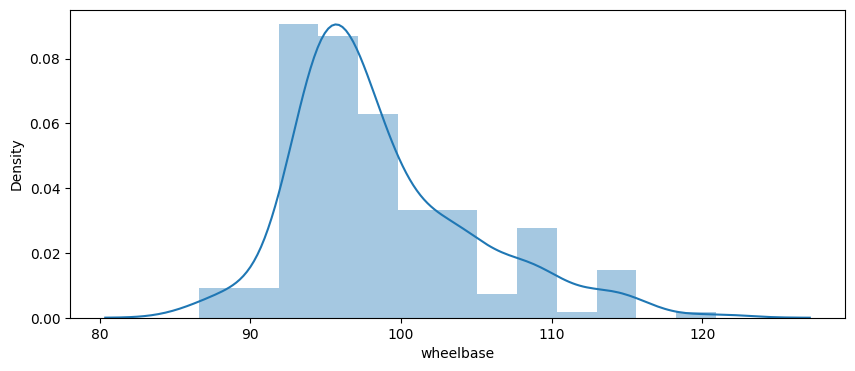

In [10]:
# ploting wheetbase distribution
plt.figure(figsize=(10,4))
sns.distplot(data.wheelbase)

plt.show()

Ploting distribution plot for `curbweight`: this is weight of car without occupants or baggage

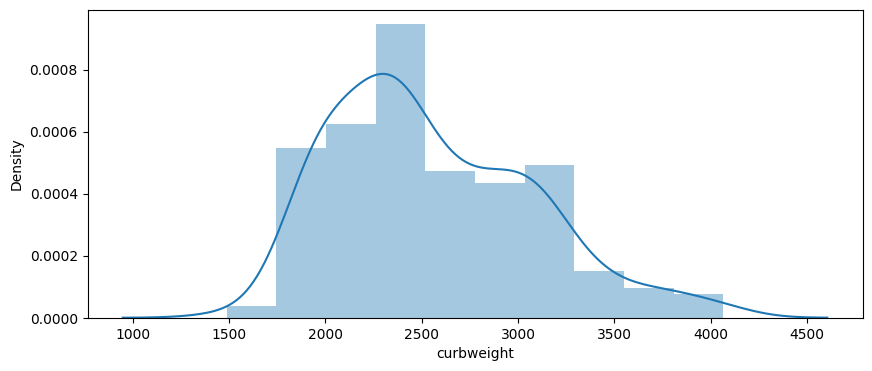

In [11]:
# ploting wheetbase distribution
plt.figure(figsize=(10,4))
sns.distplot(data.curbweight)

plt.show()

Ploting distribution plot for `stroke`: this is volume of engine (distance traveled by piston in each cycle)

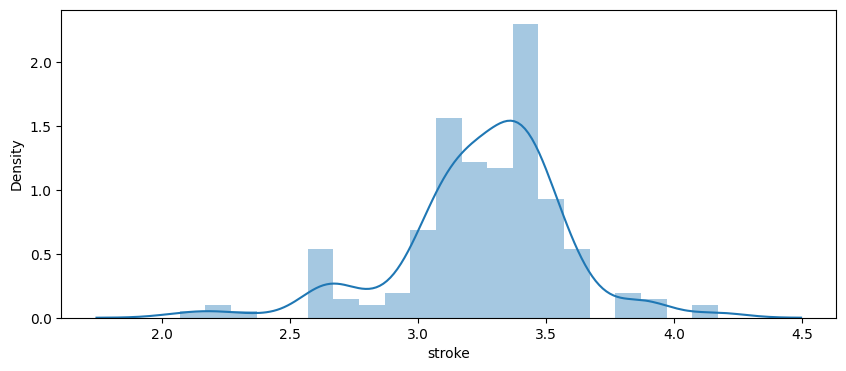

In [12]:
# ploting wheetbase distribution
plt.figure(figsize=(10,4))
sns.distplot(data.stroke)

plt.show()

Ploting distribution plot for `compressionratio`: this is ratio of volume of compression chamber at largest capacity to least capacity

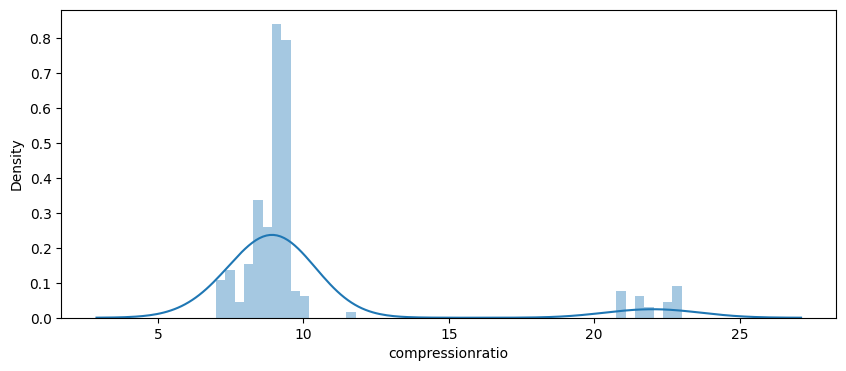

In [13]:
# ploting wheetbase distribution
plt.figure(figsize=(10,4))
sns.distplot(data.compressionratio)

plt.show()

Ploting distribution plot for target variable `price`: this is price of car

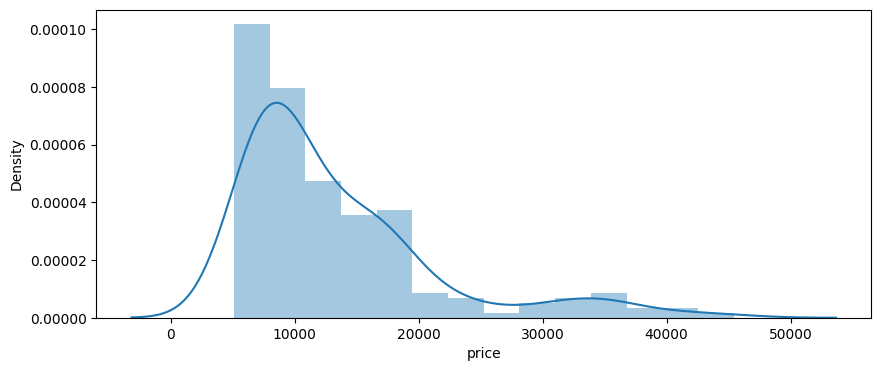

In [14]:
# ploting price distribution
plt.figure(figsize=(10,4))
sns.distplot(data.price)

plt.show()

# Data Exploration
To perform Linear Regression(numeric) target variable should be linearly related to at least one another numeric variable
* Let's see whether that's true in this case

`Steps`:<br>
1. subseting list of all (independent)numeric variables and then
2. making a pairwise plot

In [ ]:
### 1.
# all numeric (float and int) variables in dataset
data_only_numeric_cols = # your code here

#head
data_only_numeric_cols.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
data_only_numeric_cols.symboling.value_counts()

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

Variable `symboling` is numeric(int) treating it as categorical, since it has only 6 discrete values
* Dont want `car_ID`.. Why?? Wait

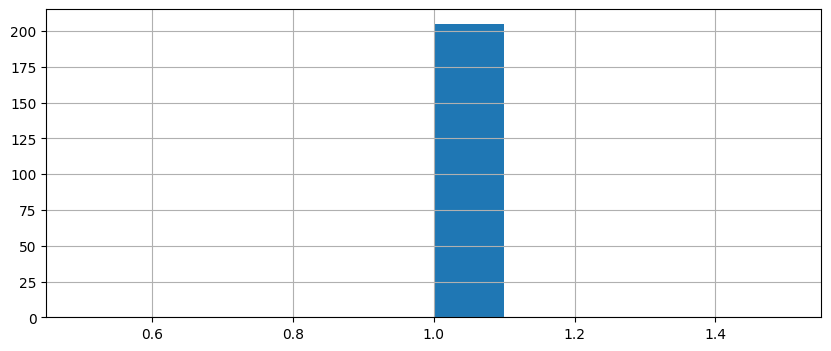

In [17]:
plt.figure(figsize=(10,4))
data_only_numeric_cols.car_ID.value_counts().hist()
plt.show()

Try to observe histogram of `car_ID` column, if you can find anything inform me then
* Most of the time ID columns are of note use, but one example where I found ID column to be usefull is `Big Mart Sales`.

In [18]:
# dropping symboling and car_ID
data_only_numeric_cols.drop(['car_ID','symboling'],axis=1,inplace=True)

data_only_numeric_cols.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


**Ploting a `Pairwise Scatter plot` and observe Linear Relationships**

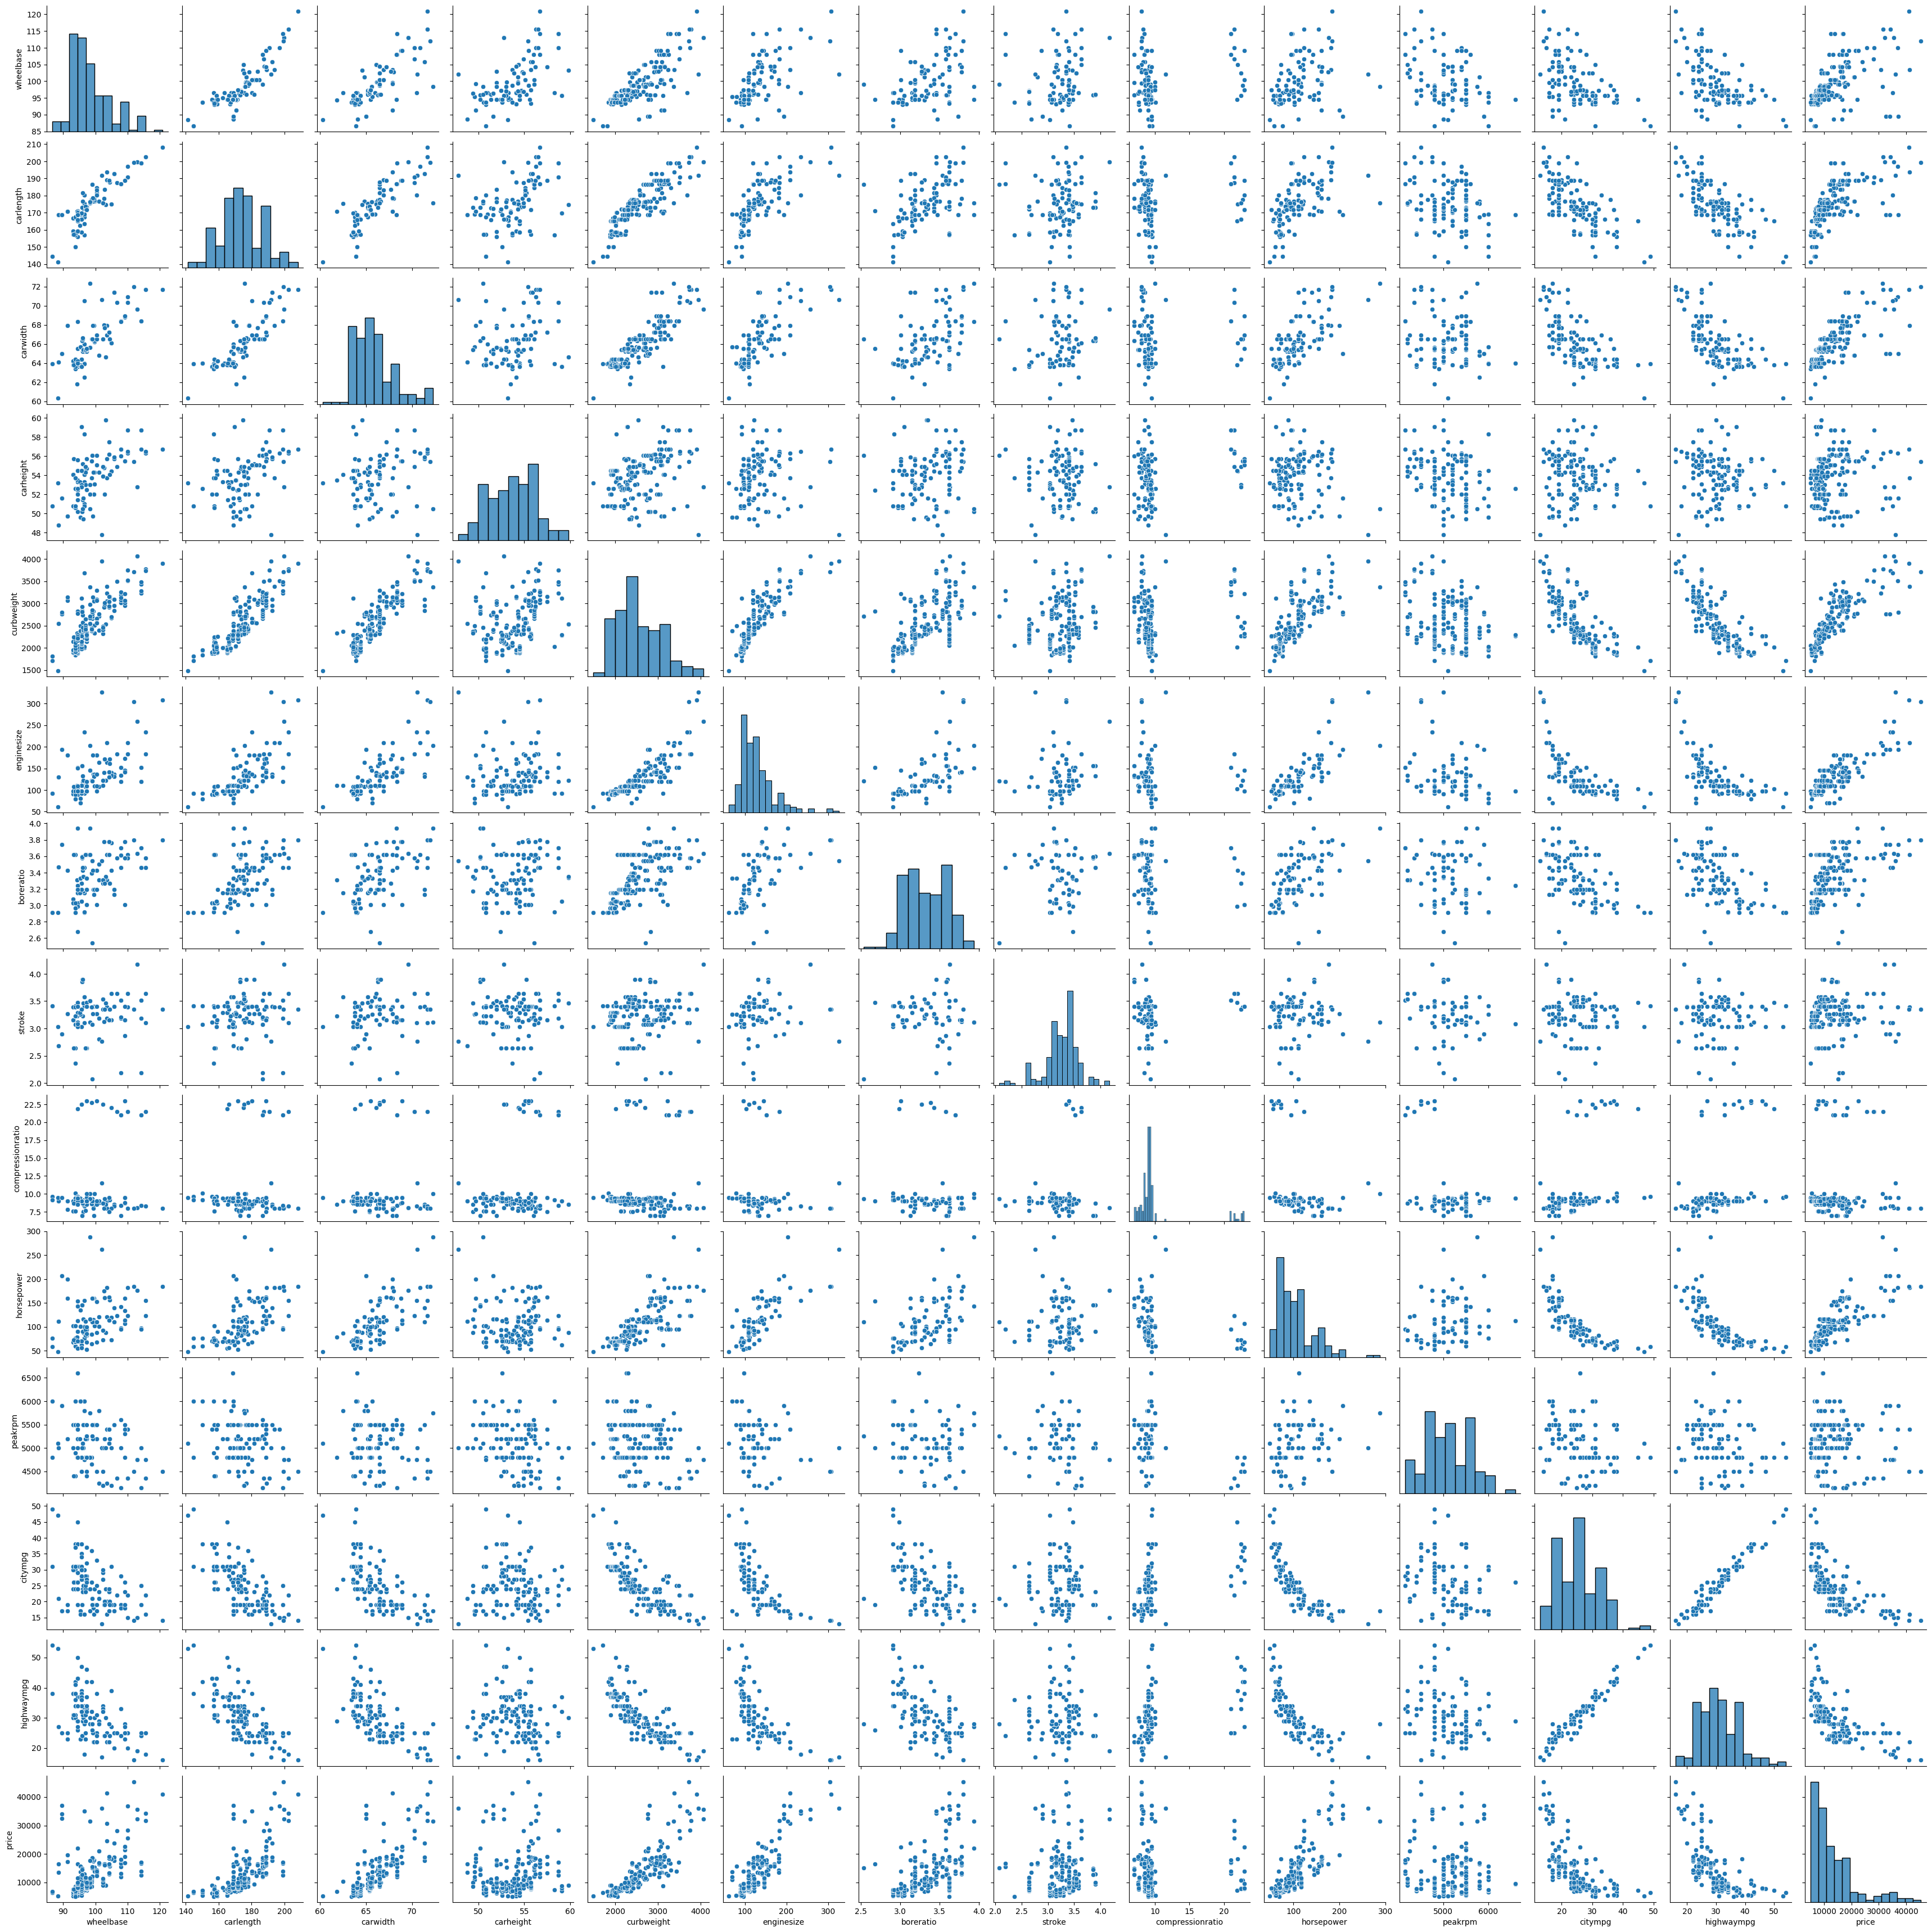

In [19]:
# paiwise scatter plot for all variables in data_only_numeric_cols

sns.pairplot(data_only_numeric_cols)


Quite hard to interpret and I can rather plot correlations between variables also a heatmap is pretty useful to visualise multiple correlations in one plot

In [20]:
# correlation matrix
corr = data_only_numeric_cols.corr()

#print cor
corr

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


**Plotting `Correlations on a Heatmap`**

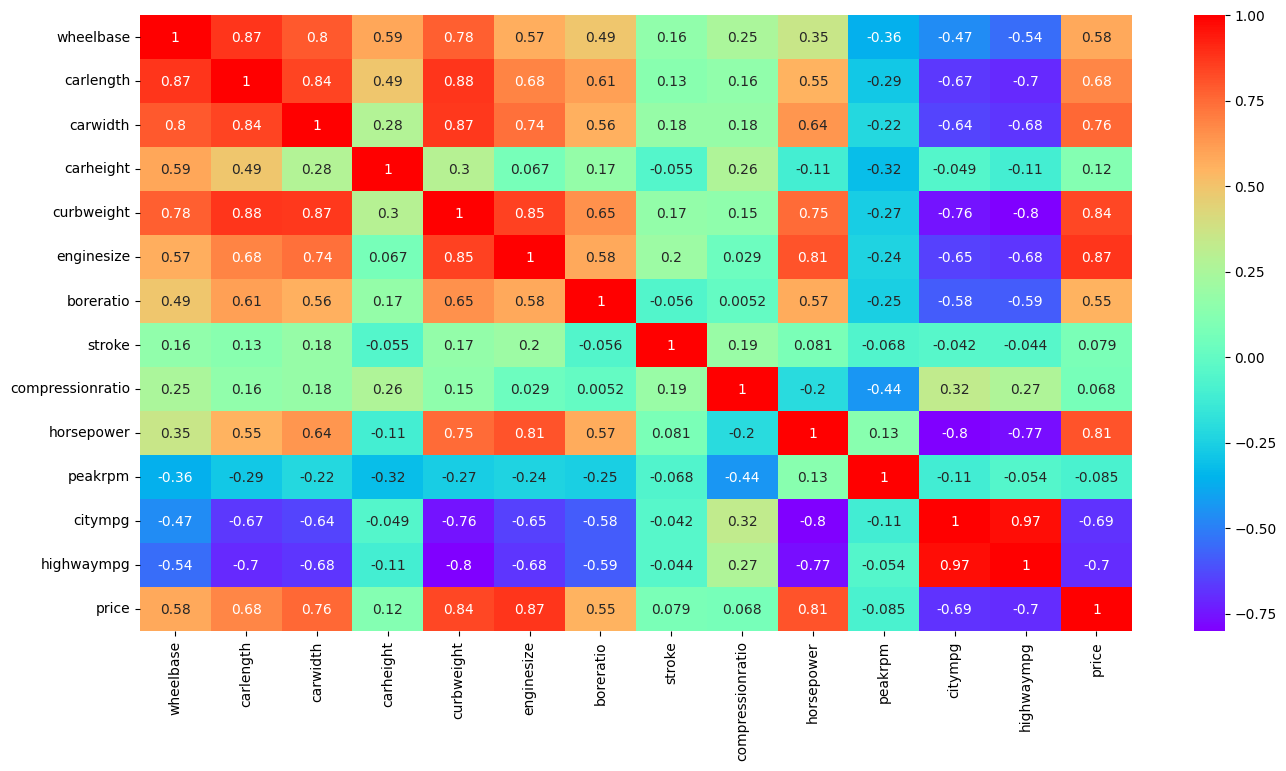

In [21]:
plt.figure(figsize=(16,8))
sns.heatmap(corr,cmap='rainbow',annot=True)

plt.show()

# Data Cleaning
There are no missing values in the dataset
Variables are in correct format except `symboling`
* `symboling` should rather be a Categorical Variable (so that dummy variable are created for that)

In [22]:
data.symboling.dtype

dtype('int64')

In [23]:
data.symboling.value_counts()

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

In [24]:
# converting symboling to categorical datatype by changing its datatype to object
data['symboling'] = data.symboling.astype('object')
data.symboling.dtype

dtype('O')

**Extracting `company_name` from `CarName` column**

In [25]:
# CarName: first few entries (upto 30)

data.CarName[:30]

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
5                      audi fox
6                    audi 100ls
7                     audi 5000
8                     audi 4000
9           audi 5000s (diesel)
10                     bmw 320i
11                     bmw 320i
12                       bmw x1
13                       bmw x3
14                       bmw z4
15                       bmw x4
16                       bmw x5
17                       bmw x3
18             chevrolet impala
19        chevrolet monte carlo
20          chevrolet vega 2300
21                dodge rampage
22          dodge challenger se
23                   dodge d200
24            dodge monaco (sw)
25           dodge colt hardtop
26              dodge colt (sw)
27         dodge coronet custom
28            dodge dart custom
29    dodge coronet custom (sw)
Name: CarName, dtype: object

Notice it that carname occurs before a space e.g. bmw 320i, chevrolet impala etc

I am tring to simply extract string before a space, I can do it in multiple ways

**`Extracting Cars_name`**

In [26]:
# Method 1: str.split() by space
cars_company_name = data.CarName.apply(lambda x:x.split(' ')[0])

# first 30 cars name
print(cars_company_name[:30])

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
Name: CarName, dtype: object


In [27]:
# Method 2: Use regular expressions
import re

# regex: any alphanumeric sequence before a space, may contain a hyphen
p = re.compile(r'\w+-?\w+')

#apply above regex pattern to CarName
cars_company_name = data.CarName.apply(lambda x:re.findall(p,x)[0])

# first 30 cars name
print(cars_company_name[:30])

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
Name: CarName, dtype: object


**`Creating new column to store Compnay Name`**

In [28]:
# value_counts for each compnay
data['cars_company_name'] = cars_company_name
data['cars_company_name'].value_counts()

cars_company_name
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
maxda           2
vw              2
mercury         1
porcshce        1
Nissan          1
toyouta         1
vokswagen       1
Name: count, dtype: int64

Try to Observe you will find some car-company names are misspelled like
* `vw and vokswagen` should be `volkswagen`
* `porcshce` should be `porsche`
* `toyouta` should be `toyota`
* `Nissan` should be `nissan`
* `maxda` should be `mazda` so oon

**`Solving Above Data Quality Issue`**

Trying to Replacing misspelled car_company names using loc

In [ ]:
# volkswagen
data.loc[(data.cars_company_name=='vw')|(data.cars_company_name=='vokswagen'),'cars_company_name']=# your code here

# porsche
data.loc[(data.cars_company_name=='porcshce'),'cars_company_name']=# your code here
# toyota
data.loc[(data.cars_company_name=='toyouta'),'cars_company_name']='toyota'

# nissan
data.loc[(data.cars_company_name=='Nissan'),'cars_company_name']='nissan'

# mazda
data.loc[(data.cars_company_name=='maxda'),'cars_company_name']='mazda'

In [30]:
# value_counts for each compnay
data['cars_company_name'].value_counts()

cars_company_name
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: count, dtype: int64

Now `cars_company_name` variable looks cool to me

**`Let's now drop CarName variable`**

In [31]:
# drop CarName variable
data.drop('CarName',axis=1,inplace=True)

In [32]:
# data statistical discription
data.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data Preparation
Now preparing data and build the model

Spliting into X and y

In [ ]:
# defining X
X = data.drop('price',axis=1)

# define the y variable


In [34]:
X.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,cars_company_name
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,audi


In [35]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

# Creating dummy variables for categorical variables

In [ ]:
# subset all categorical variables
# select all the columns in X with object datatype
data_only_cat = # your code here

data_only_cat.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,cars_company_name
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [ ]:
# convert into dummies
data_only_cat_dummies = # your code here
data_only_cat_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,cars_company_name_nissan,cars_company_name_peugeot,cars_company_name_plymouth,cars_company_name_porsche,cars_company_name_renault,cars_company_name_saab,cars_company_name_subaru,cars_company_name_toyota,cars_company_name_volkswagen,cars_company_name_volvo
0,False,False,False,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
# droping categorical variables from X

X.drop(list(data_only_cat),axis=1,inplace=True)

In [39]:
X.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [40]:
# concat dummy variables with X

X = pd.concat([X,data_only_cat_dummies],axis=1)

In [41]:
X.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cars_company_name_nissan,cars_company_name_peugeot,cars_company_name_plymouth,cars_company_name_porsche,cars_company_name_renault,cars_company_name_saab,cars_company_name_subaru,cars_company_name_toyota,cars_company_name_volkswagen,cars_company_name_volvo
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,False,False,False
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,False,False,False
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,False,False,False
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,False,False,False
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,False,False,False


# Feature Scaling

In [42]:
from sklearn.preprocessing import scale

In [43]:
X = pd.DataFrame(scale(X),columns=X.columns)
X.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cars_company_name_nissan,cars_company_name_peugeot,cars_company_name_plymouth,cars_company_name_porsche,cars_company_name_renault,cars_company_name_saab,cars_company_name_subaru,cars_company_name_toyota,cars_company_name_volkswagen,cars_company_name_volvo
0,-1.723622,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
1,-1.706724,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
2,-1.689826,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
3,-1.672928,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
4,-1.656029,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812


## Splitting into train test

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
# split into train and test with test_size=30% and random_state=108
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=108)

In [46]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((143, 69), (62, 69), (143,), (62,))

# Ridge Regression (L2 Regularization)
**`Cross Validation and Hyperparameter Tuning`**

In [47]:
# list of alpha to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                    10.0, 20, 50, 100, 500, 1000 ]}

#initialising Ridge() function
ridge = Ridge()
# defining cross validation folds as 5
folds = 5

In [ ]:
# Defining GridSearchCV
grid_cv_model = GridSearchCV(estimator=# your code here,
                       param_grid=# your code here,
                       scoring='neg_mean_absolute_error',
                       cv= # your code here,
                       return_train_score=True,
                       verbose=1)
# we use neg_mean_absolute_error as scoring metric because it is a regression problem and negative mean absolute error is a common metric for regression problems 

# fiting GridSearchCV() with X_train and y_train
# your code here

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
# Saving GridSearchCV results into a dataframe
cv_results = pd.DataFrame(grid_cv_model.cv_results_)

# filter cv_results with all param_alpha less than or equal to 200
cv_results = cv_results[cv_results['param_alpha']<=200]
# we are taking only those values of alpha which are less than or equal to 200 because we dont want to regularize too much

# cv_results head
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.024656,0.013108,0.012020,0.003437,0.0001,{'alpha': 0.0001},-2186.835291,-2670.320508,-2357.761171,-3685.889006,...,-2719.532107,519.889569,27,-877.868785,-881.392182,-967.391224,-955.301631,-855.981598,-907.587084,44.912558
1,0.013163,0.000224,0.010108,0.000577,0.0010,{'alpha': 0.001},-2191.251081,-2627.322278,-2337.838222,-3630.933940,...,-2694.091654,502.397712,26,-877.979742,-880.128928,-967.824109,-954.464601,-853.668030,-906.813082,45.521017
2,0.013324,0.000513,0.010095,0.000249,0.0100,{'alpha': 0.01},-2210.526075,-2339.833000,-2186.994845,-3275.580980,...,-2519.574643,403.545633,24,-879.039049,-875.021473,-971.503706,-950.915881,-849.462103,-905.188442,47.303223
3,0.013699,0.000787,0.009642,0.000122,0.0500,{'alpha': 0.05},-2164.526074,-2064.161496,-1879.700004,-2854.727041,...,-2278.569904,338.491377,23,-895.112874,-896.117603,-984.215037,-953.751470,-872.823302,-920.404057,41.658841
4,0.013273,0.000277,0.009728,0.000073,0.1000,{'alpha': 0.1},-2086.978942,-2040.778033,-1738.374625,-2732.280464,...,-2182.044197,330.283228,22,-904.406433,-912.992346,-996.149181,-956.832157,-891.283525,-932.332728,38.760101


`Note`:<br>
Training results depend on the way train data is splitted in cross validation

Each time I run, data is splitted randomly and hence can observe minor differences in your answer

**`plotting mean train and test scores with alpha`**

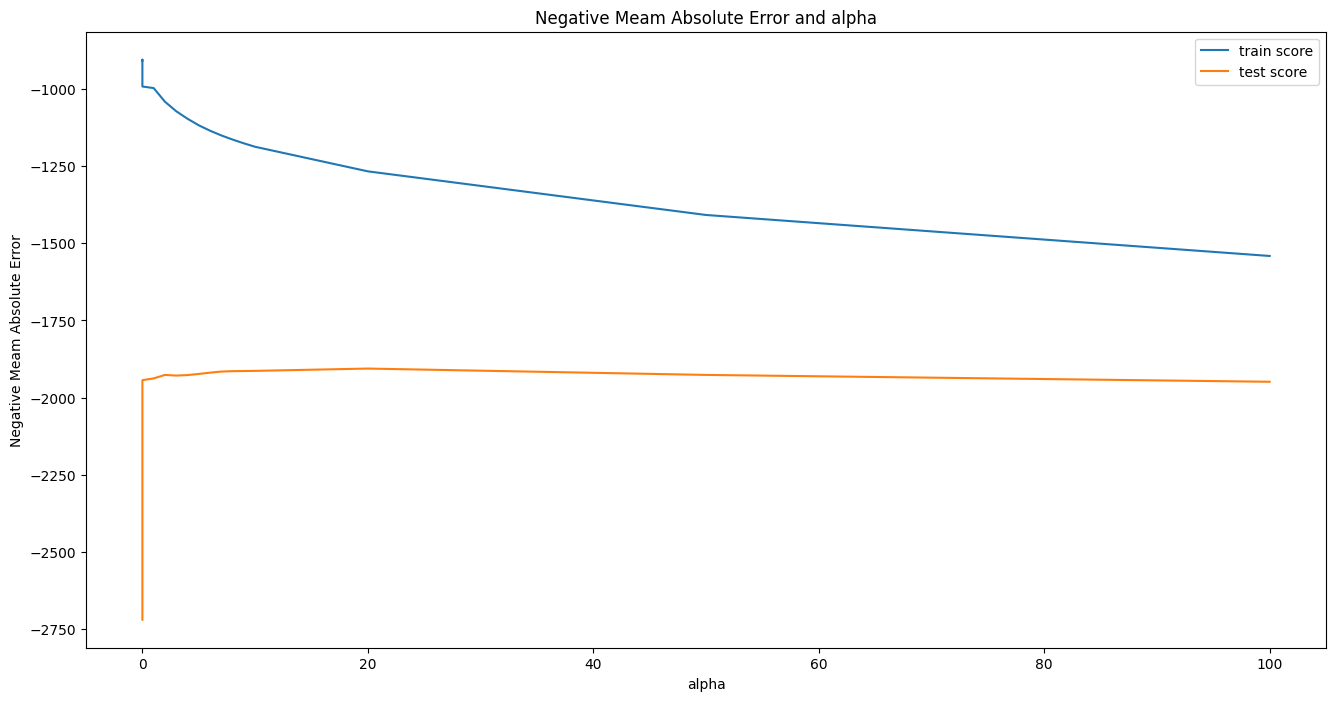

In [50]:
# changing datatype of 'param_alpha' into int
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Meam Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Meam Absolute Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()

In [ ]:
# checking best alpha from model_cv
grid_cv_model.# your code here

{'alpha': 20}

Observe that test and train scores start to become parallel to each other after apha crosses 20

* So lets check our ridge model on alpha 20

In [52]:
#seting alpha as 20
alpha = 20

# Initialising Ridge() with above alpha
ridge =Ridge(alpha=alpha)

#fitting model
ridge.fit(X_train,y_train)

#printing ridge coeficients
ridge.coef_

array([-5.73105227e+02,  6.89532248e+02,  2.78163595e+02,  8.70522150e+02,
        3.30961135e+01,  1.07240359e+03,  1.37563734e+03,  9.40704272e+01,
       -2.37931489e+02,  5.37817048e+01,  1.06993966e+03,  1.89264544e+02,
       -1.82311174e+02, -1.50728935e+02, -1.02562094e+02,  2.57796560e+02,
        1.40312546e+02, -2.86221989e+02,  1.07473151e+01, -1.73768766e+02,
        1.46252289e+02,  8.86595362e+01,  1.34044023e+02, -3.55689909e+02,
       -1.82159232e+02, -5.18521432e+02, -2.62194971e+02,  1.62333042e+02,
        8.31608459e+02, -1.49878717e+01, -2.29894019e+02,  1.86855419e+02,
        7.15781868e+01,  1.18900865e+02,  1.09008726e+02, -4.63107856e+02,
       -6.11747309e+02, -1.97301390e+01,  3.04858252e+02, -1.55206392e-28,
        1.09008726e+02, -3.38905596e+01, -9.76994743e+01,  1.73768766e+02,
       -1.55206392e-28,  2.81911693e+02, -1.02299066e+02, -1.55206392e-28,
        2.54984974e+02,  1.11525408e+03,  1.14103894e+03, -9.62154385e+01,
       -3.58302460e+02, -

# Lasso
**`Cross Validation and Hyperparameter Tuning`**

In [53]:
# Initialising Lasso()
lasso = Lasso()

#usig same attributes used for Ridge tuning except estimator here would be lasso
grid_cv_model = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
#fiting model_cv
grid_cv_model.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:
# Saving model_cv results into a dataframe
cv_results = pd.DataFrame(grid_cv_model.cv_results_)

# cv_results head
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.044314,0.013659,0.009199,0.001737,0.0001,{'alpha': 0.0001},-2269.219983,-2174.303765,-2030.461294,-2839.955003,...,-2371.506234,288.000139,25,-890.228144,-895.868096,-973.220671,-955.308359,-870.439741,-917.013002,39.898473
1,0.035710,0.001911,0.008426,0.001375,0.0010,{'alpha': 0.001},-2269.173966,-2174.679684,-2030.237618,-2840.346361,...,-2371.585963,288.120479,26,-890.233359,-895.885069,-973.227474,-955.305027,-870.452116,-917.020609,39.894362
2,0.037052,0.001842,0.008164,0.000803,0.0100,{'alpha': 0.01},-2268.709503,-2178.438856,-2028.003454,-2844.252428,...,-2372.381310,289.330653,27,-890.285238,-896.054746,-973.295417,-955.271913,-870.575873,-917.096637,39.853352
3,0.037129,0.001088,0.008221,0.001348,0.0500,{'alpha': 0.05},-2266.541375,-2195.146288,-2018.103525,-2837.751681,...,-2371.127030,287.105881,24,-890.509304,-896.806968,-973.599133,-955.151852,-871.125760,-917.438603,39.678773
4,0.038614,0.002157,0.008254,0.001207,0.1000,{'alpha': 0.1},-2263.390884,-2191.820607,-2005.415686,-2820.472685,...,-2362.731700,284.647828,23,-890.838413,-897.771778,-974.011450,-955.209476,-871.881485,-917.942520,39.485849


**`plotting mean train and test scores with alpha`**

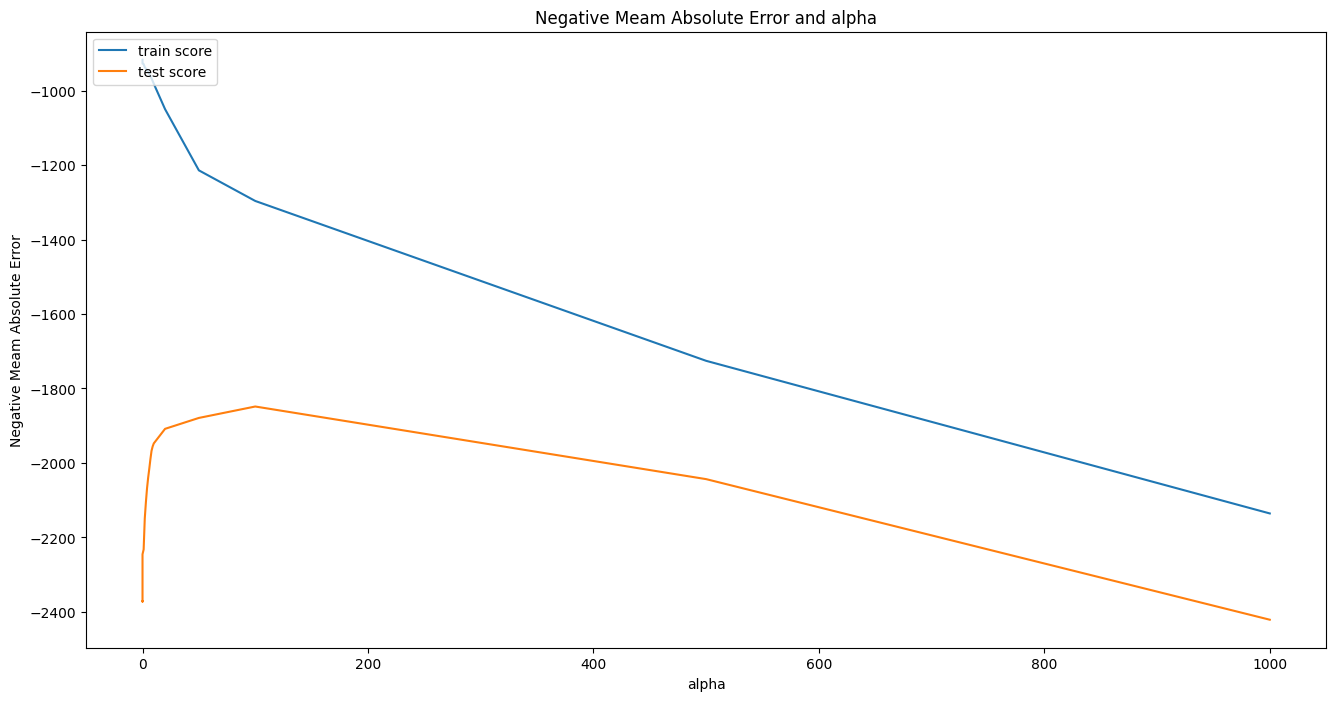

In [55]:
# changing param_alpha datatype to float
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Meam Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Meam Absolute Error')
plt.legend(['train score','test score'],loc='upper left')

plt.show()

In [56]:
# Checking best  alpha from model_cv
grid_cv_model.best_params_

{'alpha': 100}

Observe that train and test scores start to become parallel to each other after apha crosses 100

* So lets check our Lasso model on alpha 100

In [57]:
# Seting alpha =100
alpha =100

# Defining lasso with above alpha
lasso =Lasso(alpha=alpha)

# fiting lasso
lasso.fit(X_train,y_train)

Lasso(alpha=100)

In [58]:
# printing lasso coeficients
lasso.coef_

array([ -84.22520875,   56.421509  ,    0.        ,  900.28639249,
          0.        , 1736.63099513, 2193.93505254,   -0.        ,
       -369.24443981,  178.35435988, 1522.07964065,  135.30694641,
          0.        ,   -0.        ,   -0.        ,    0.        ,
          0.        , -111.48625164,   -0.        ,   -0.        ,
          0.        ,    0.        ,    0.        , -269.76735193,
          0.        , -431.4138248 ,   -0.        ,    0.        ,
       1135.99633323,    0.        ,   -0.        ,    0.        ,
         -0.        ,   -0.        ,  380.42944272,   -0.        ,
         -0.        ,   -0.        ,  233.39722306,   -0.        ,
         45.41147304,   -0.        ,    0.        ,    0.        ,
         -0.        ,    0.        ,  -69.83366348,   -0.        ,
        385.16157484, 1671.51809527, 1419.66936461,    0.        ,
         -0.        ,   -0.        ,    0.        ,  672.05459735,
          0.        ,  -36.92745329, -314.01352798, -104.56060

# ElasticNet Regression
**`Cross Validation and Hyperparameter Tuning`**

In [59]:
# Initialising ElasticNet()
elasticnet = ElasticNet()

#using same attributes used for Ridge tuning except estimator here would be ElasticNet
grid_cv_model = GridSearchCV(estimator=elasticnet,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
#fitingmodel_cv
grid_cv_model.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [60]:
# Saving model_cv results into a dataframe
cv_results = pd.DataFrame(grid_cv_model.cv_results_)

# cv_results head
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.041214,0.007806,0.008351,0.001971,0.0001,{'alpha': 0.0001},-2257.138715,-2168.873475,-2004.039322,-2834.257233,...,-2358.228061,292.080396,19,-890.925327,-897.447526,-974.600134,-955.365169,-871.575949,-917.982821,39.775279
1,0.036100,0.002690,0.007346,0.000987,0.0010,{'alpha': 0.001},-2159.418930,-2122.079508,-1811.274861,-2765.169419,...,-2250.595867,317.326868,17,-899.993101,-909.415311,-987.540658,-956.744816,-883.232606,-927.385299,38.738513
2,0.042269,0.001847,0.008228,0.001124,0.0100,{'alpha': 0.01},-1832.495107,-2073.591806,-1546.776908,-2522.127438,...,-1976.080458,321.741582,13,-956.984542,-943.219516,-1056.261277,-978.269980,-934.464219,-973.839907,43.783705
3,0.019707,0.001450,0.007909,0.000477,0.0500,{'alpha': 0.05},-1715.030493,-2161.537805,-1626.427921,-2389.491015,...,-1928.242746,295.280981,10,-1082.814146,-1022.630977,-1147.601029,-1042.868876,-1046.114597,-1068.405925,44.099549
4,0.017642,0.001081,0.007639,0.000376,0.1000,{'alpha': 0.1},-1725.519391,-2169.243863,-1675.015730,-2311.932544,...,-1919.593495,266.489938,6,-1152.245614,-1076.136105,-1196.499381,-1098.104428,-1130.727556,-1130.742617,42.032020


**`plotting mean train and test scores with alpha`**

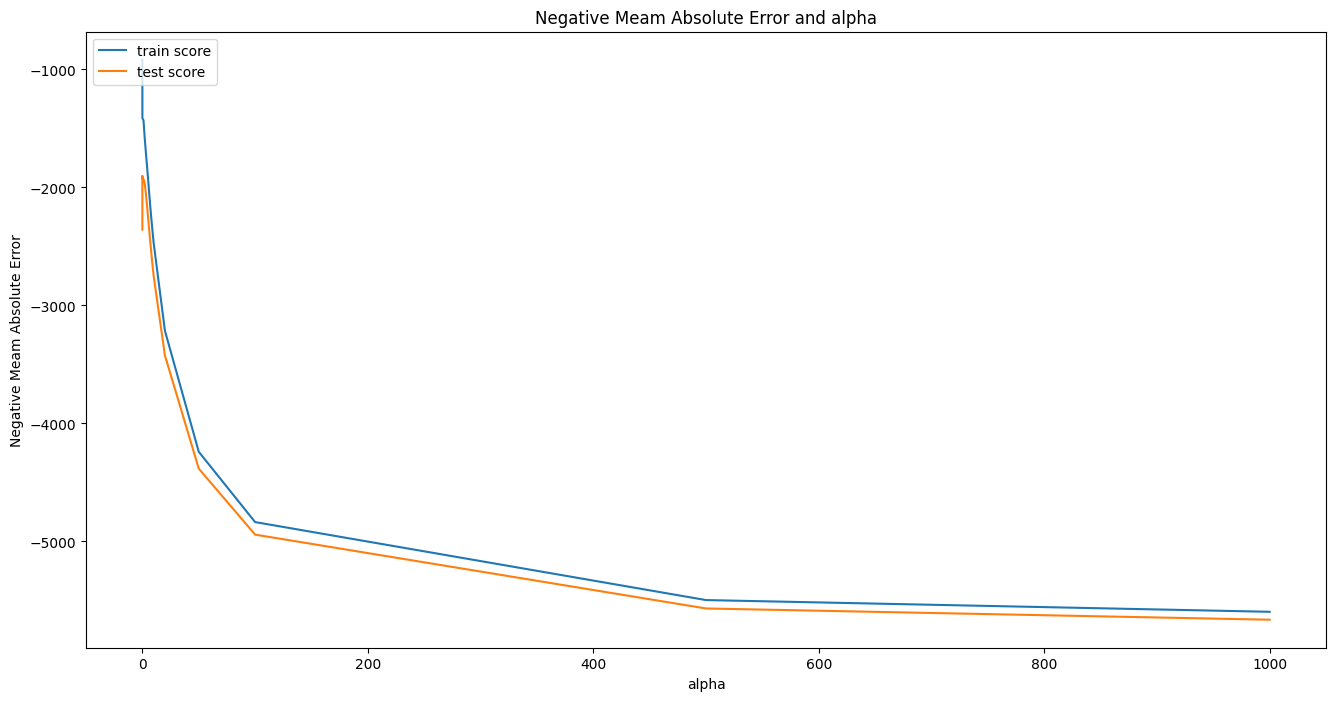

In [61]:
# change param_alpha datatype to float
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Meam Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Meam Absolute Error')
plt.legend(['train score','test score'],loc='upper left')

plt.show()

In [62]:
# Checking best  alpha from model_cv
grid_cv_model.best_params_

{'alpha': 0.3}

Observe that train and test scores start to become parallel to each other after apha crosses 0.3
* So lets check our Elastic model on alpha 0.3

In [63]:
# Seting alpha=0.3
alpha =0.3

# Defining ElasticNet with above alpha
elasticnet = ElasticNet(alpha=alpha)

# fiting elastic net
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.3)

In [64]:
# printing ElasticNet coeficients
elasticnet.coef_

array([-569.01392496,  679.12195604,  296.65924844,  864.59180059,
         41.66589264, 1047.85107057, 1347.71205968,  104.95203923,
       -230.00848697,   57.11174306, 1049.73376256,  177.94350384,
       -191.24370519, -161.01131324, -103.6636834 ,  249.10472475,
        136.22732605, -284.38522234,   15.21399281, -170.174017  ,
        141.94256299,   88.83423882,  147.65240781, -339.40883239,
       -160.67524827, -507.15438345, -260.46764846,  174.64941326,
        822.45245631,   -2.91079817, -228.75329167,  175.88322618,
         69.05359315,  124.25900444,  102.71047538, -439.49329741,
       -610.96904079,    0.        ,  297.82240191,    0.        ,
        102.69892396,  -46.21950954,  -97.28588892,  170.18205537,
          0.        ,  282.35475209, -103.44692194,    0.        ,
        244.41498619, 1104.41774814, 1130.47752039,  -86.370595  ,
       -347.25874396, -322.20460595, -139.16163714,  611.00396969,
       -279.77560209, -201.61775939, -341.1290249 , -335.02199

# Model Evaluation
I am trying to compare all three model result using error term `RMSE` Root Mean Squared Error

In [65]:
# Calculating all 3 predictions
pred_by_lasso =  lasso.predict(X_test)
pred_by_ridge = ridge.predict(X_test)
pred_by_elasticnet = elasticnet.predict(X_test)


# printing RMSE for all 3 techniques
print(f'Lasso RMSE: {np.sqrt(mse(y_test,pred_by_lasso))}')
print(f'Ridge RMSE: {np.sqrt(mse(y_test,pred_by_ridge))}')
print(f'ElasticNet RMSE: {np.sqrt(mse(y_test,pred_by_elasticnet))}')

Lasso RMSE: 2147.054965103895
Ridge RMSE: 2138.3923938552484
ElasticNet RMSE: 2148.8983411652325


Observe for our problem statement Ridge as a regularization technique giving best result

